# Mount drive (colab)

In [13]:
from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/visiope
!rm -rf vp_project
!git clone https://github.com/fabioscap/vp_project
%cd vp_project

ModuleNotFoundError: No module named 'google'

# Load The Dataset

In [2]:
import utils
import torch
from torch.utils.data import DataLoader,random_split
import torchvision
import model

import matplotlib.pyplot as plt

p = 1
depth_sampling = lambda x: utils.sample_depth_random(x,p)

depth_transform = torchvision.transforms.Lambda(depth_sampling)
data = utils.NYUDepthV2("../NYUDepthv2", 
                        shape=(240,320),
                        depth_transform=depth_transform,
                        )

train_size = int(0.8*len(data))
test_size = len(data)-train_size

train_data, test_data = random_split(data,[train_size,test_size])

train_loader = DataLoader(train_data,
                          batch_size=4,
                          shuffle=True,
                          num_workers=4,
                          pin_memory=True)

test_loader = DataLoader(test_data,
                          batch_size=4,
                          shuffle=True,
                          num_workers=4,
                          pin_memory=True)

# Display one sample

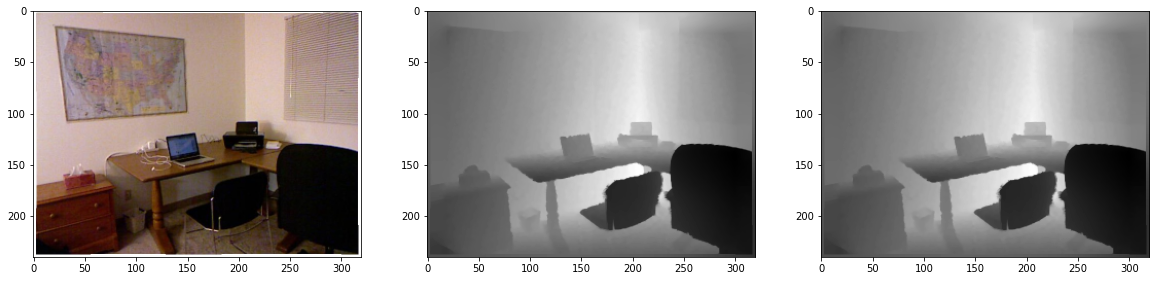

In [3]:
sample = data[int(torch.rand(1).item()*len(data))]

rgb = sample["rgb"]
depth = sample["depth"]
depth_t = sample["depth_t"]
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))


ax1.imshow(rgb.permute(1,2,0))
ax2.imshow(depth.squeeze(0),cmap="gray")
ax3.imshow(depth_t.squeeze(0),cmap="gray")

# Load The Model

In [4]:
from torch import optim

import model

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device = torch.device("cpu")

net = model.Net1().to(device)

optimizer = optim.SGD(net.parameters(),lr=10**-3,momentum=0.9)

# scheduler = ...

net.load_state_dict(torch.load("weights/net1.pth"))

In [12]:
utils.train(model=net,
            n_epochs = 1,
            loss_fn = utils.rmse,
            optimizer= optimizer,
            device = device,
            loader = train_loader,
            log=True)

# Show a prediction

In [8]:
#sample = next(iter(train_loader))
net.load_state_dict(torch.load("weights/net1.pth"))
rgb = sample["rgb"].to(device)
depth = sample["depth"].to(device)
depth_t = sample["depth_t"].to(device)

with torch.no_grad():
    net.eval()
    out = net(rgb,depth_t).squeeze(0)



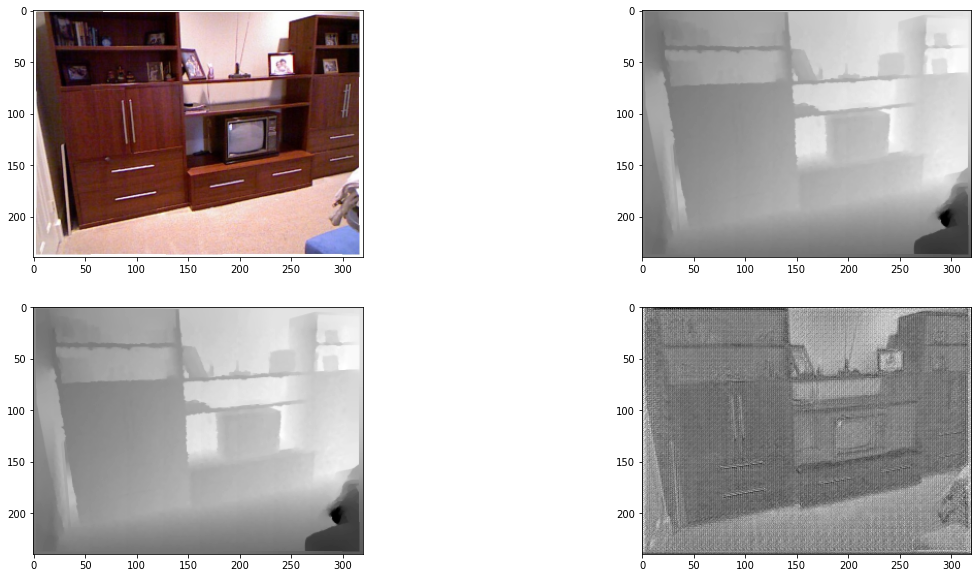

In [9]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10))

ax1.imshow(rgb[0,...].permute(1,2,0).cpu())
ax2.imshow(depth_t[0,0,...].cpu(),cmap="gray")
ax3.imshow(depth[0,0,...].cpu(),cmap="gray")
ax4.imshow(out.detach()[0,0,...].cpu(),cmap="gray")

In [10]:

utils.rmse(depth,out)

tensor(0.0217)

In [1]:
import torch

In [2]:
n = 10

x = torch.rand((n,1),requires_grad=True)

w = torch.zeros((n,1),requires_grad=True)

In [5]:
wx = torch.dot(w,x)

sigma = torch.sigmoid(wx)

sigma

tensor([[0.5000]])